# Heart Disease Prediction Classification on the Cleveland Dataset
**Owen Kwong, Arissa Tejani, Emily Kehler, and Miaomiao Zhu (Group 18)** 

## Introduction

**Research Question:**  *How accurately can we predict the likelihood of heart disease based on given health factors?*

Following the rise of comfortable and perhaps unhealthy lifestyles, heart disease became the most common cause of death by the mid 20th century in the United States (Dalen et al., 2014). The phrase "heart disease" can refer to various different conditions relating to the heart. Symptoms can range from chest pain and shortness of breath to more extreme symptoms, such as heart attack and failure. A wide range of factors can impact the likelihood of having heart disease; further, doctors may find it useful to posess a model that could predict if an individual has heart disease.

The goal of this project is to determine the accuracy of predicting heart disease based on certain factors using K-nearest-neighbours (KNN) classification. We will use  Cleveland database, extracted from the UCI Machine Learning Repository's [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), to provide data on such factors including age, maximum heart rate, etcetera. While there are other databases, the repository highlights that the Cleveland database is the only one that is used by machine learning researchers so this is the one we will use (Detrano, 1990). The database was extracted from the work of Dr. Robert Detrano with V.A. Medical Center.

## Methods and Results

In [1]:
#load packages 
library(tidyverse)
library(repr)
library(cowplot)
library(tidymodels)

#set seed
set.seed(1234)

#number rows for table
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#import through link
link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
untidy_cleveland <- read_csv(link, col_names = FALSE)
untidy_cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [3]:
#renaming the column names
colnames(untidy_cleveland) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

tidy_cleveland = untidy_cleveland |> 
 filter(ca != "?", thal != "?") |>   #in ca and thal there were "?" values
 mutate(age = as.integer(age)) |> #age cannot be decimals
 mutate(ca = as.factor (ca), num = as.factor(num), sex = as.factor(sex), cp = as.factor(cp), fbs = as.factor(fbs), restecg = as.factor(restecg), exang = as.factor(exang), slope = as.factor(slope), thal = as.factor(thal))   #categorical data not <dbl>

tidy_cleveland

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
new_cleveland <- tidy_cleveland |> 
#if num >= 1, change to "Y" else "N" ("Y" = disease present, "N" = no disease)
 mutate(disease = ifelse(num == 1 | num == 2 | num == 3 | num == 4, "Y", "N")) |> 
 mutate(disease = as.factor(disease)) |>
 select(-num)

In [5]:
#stratifying disease such that sufficient proportions of 1 and 0 in each set
cleveland_split <- initial_split(new_cleveland, prop = 0.75, strata = disease) 

disease_training <- training(cleveland_split)

disease_testing <- testing(cleveland_split)

disease_training #tibble is 222 x 14, 297 * 0.75 = 222.75 so successfully split

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,N
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,N
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,N
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,N
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,Y
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,Y
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,Y
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Y


### 2. Choosing Predictors

In [6]:
# some that look ok are 
# ca cp thal
# age trestbps chol thalach oldpeak 

### 3. Methods of Analysis

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.76


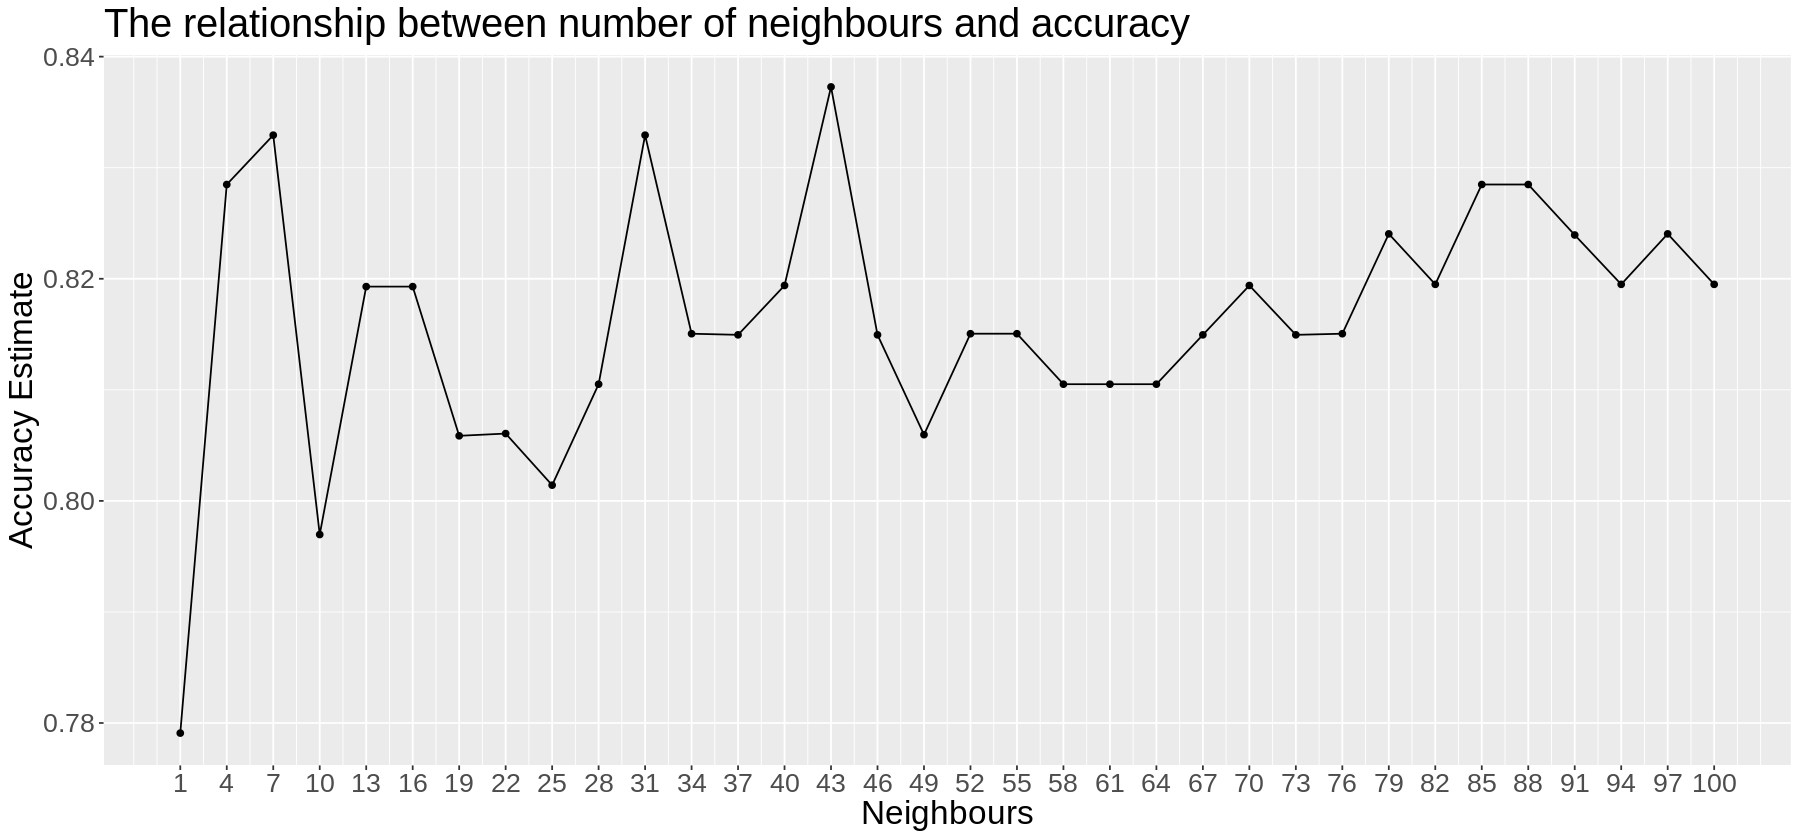

In [8]:
set.seed(1234)

# vfold 
cleveland_vfold <- vfold_cv(disease_training, v = 5, strata = disease)

# tune spec 
tuning_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

# recipe 
cleveland_recipe <- recipe(disease ~ ca + cp + thal + oldpeak, data = disease_training) |> 
                     step_scale(oldpeak) |> 
                     step_center(oldpeak)
                     
# create a grid vals for k? 
grid_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 3))

# workflow 
cleveland_results <- workflow() |> 
                      add_recipe(cleveland_recipe) |>
                      add_model(tuning_spec) |> 
                      tune_grid(resamples = cleveland_vfold, grid = grid_vals) |> 
                      collect_metrics() |> 
                      filter(.metric == "accuracy")

# plot k against accuracy to choose 
options(repr.plot.length = 10, repr.plot.width = 15)
k_val_plot <- ggplot(cleveland_results, aes(x = neighbors, y = mean)) +
               geom_point() + 
               geom_line() + 
               scale_x_continuous(breaks = seq(from = 1, to = 100, by = 3)) + 
               labs(x = "Neighbours", y = "Accuracy Estimate") + 
               ggtitle("The relationship between number of neighbours and accuracy") + 
               theme(text = element_text(size = 20))
k_val_plot

# do a best spec and put into workflow
cleveland_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 89) |> 
                   set_engine("kknn") |> 
                   set_mode("classification")

cleveland_fit <- workflow() |> 
                  add_recipe(cleveland_recipe) |> 
                  add_model(cleveland_spec) |> 
                  fit(data = disease_training)                    
                           
# compute prediction 
cleveland_prediction <- predict(cleveland_fit, disease_testing) |> 
                         bind_cols(disease_testing) |> 
                         metrics(truth = disease, estimate = .pred_class) |> 
                         filter(.metric == "accuracy") 
                        
cleveland_prediction 

## Discussion

## References

Dalen, J. E., Alpert, J. S., Goldberg, R. J., &amp; Weinstein, R. S. (2014). The epidemic of the 20th century: Coronary heart disease. The American Journal of Medicine, 127(9), 807–812. https://doi.org/10.1016/j.amjmed.2014.04.015 

Detrano, R. (1990). *Cleveland* [Data set]. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation.      
     https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data